### 1. Import Library dan Dataset

In [1]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Import dataset
url = "https://raw.githubusercontent.com/Bahar812/-Adult-Income/refs/heads/main/adult.csv"
df = pd.read_csv(url)

# Tampilkan informasi dasar tentang dataset
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_info, df_head, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


(None,
    age  workclass  fnlwgt     education  educational-num      marital-status  \
 0   25    Private  226802          11th                7       Never-married   
 1   38    Private   89814       HS-grad                9  Married-civ-spouse   
 2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
 3   44    Private  160323  Some-college               10  Married-civ-spouse   
 4   18          ?  103497  Some-college               10       Never-married   
 
           occupation relationship   race  gender  capital-gain  capital-loss  \
 0  Machine-op-inspct    Own-child  Black    Male             0             0   
 1    Farming-fishing      Husband  White    Male             0             0   
 2    Protective-serv      Husband  White    Male             0             0   
 3  Machine-op-inspct      Husband  Black    Male          7688             0   
 4                  ?    Own-child  White  Female             0             0   
 
    hours-per-wee

### 2. Data Preprocessing

##### Kita akan mengecek nilai yang hilang dan melakukan normalisasi untuk membantu kinerja model.

In [2]:
import numpy as np

# Cek missing values
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang:\n", missing_values)

# Tentukan kolom numerik yang akan diganti nilai 0-nya dengan rata-rata kolom
cols_to_replace_zeros = [
    'age', 'capital-gain', 'capital-loss', 'hours-per-week'
]

# Gantilah nilai 0 pada kolom tertentu dengan nilai rata-rata kolom
for col in cols_to_replace_zeros:
    df[col].replace(0, np.nan, inplace=True)  # Mengganti nilai 0 dengan NaN
    df[col].fillna(df[col].mean(), inplace=True)  # Mengganti NaN dengan rata-rata kolom


Jumlah nilai yang hilang:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### 3. Exploratory Data Analysis (EDA)

##### Kita akan memvisualisasikan distribusi kelas target serta beberapa fitur penting.

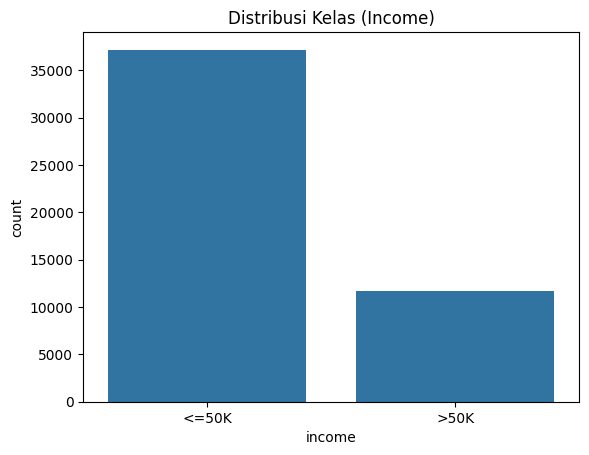

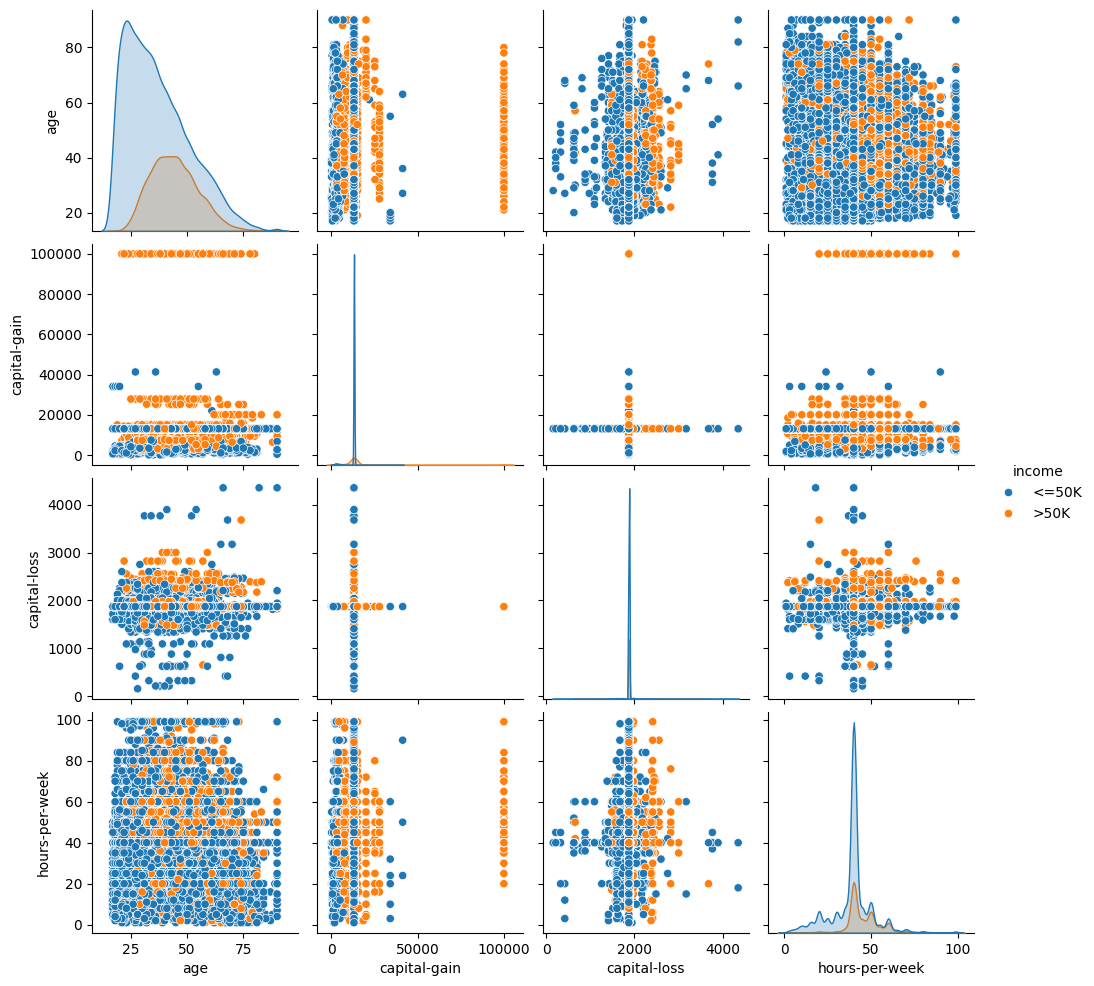

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi kelas untuk kolom income
sns.countplot(x='income', data=df)
plt.title("Distribusi Kelas (Income)")
plt.show()

# Visualisasi hubungan antara beberapa fitur numerik menggunakan pairplot
# Memilih beberapa fitur numerik yang dianggap signifikan
selected_features = [
    'age', 'capital-gain', 'capital-loss', 'hours-per-week'
]

sns.pairplot(df[selected_features + ['income']], hue="income")
plt.show()


### 4. Split Data untuk Training dan Testing

##### Kita akan membagi data menjadi 80% untuk training dan 20% untuk testing.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# Ubah kolom kategori menjadi numerik menggunakan One-Hot Encoding
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 
                                 'relationship', 'race', 'gender', 'native-country'], drop_first=True)

# Pisahkan fitur dan target
X = df.drop('income', axis=1)
y = df['income']

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### 5. Klasifikasi dengan Decision Tree, Random Forest, dan SVM

### Decision Tree

In [5]:
# Inisialisasi model Decision Tree dan fit model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88      7479
        >50K       0.62      0.63      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Accuracy: 0.8217831917289384
Confusion Matrix:
 [[6581  898]
 [ 843 1447]]


###  Random Forest

In [6]:
# Inisialisasi model Random Forest dan fit model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91      7479
        >50K       0.71      0.62      0.66      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Accuracy: 0.8529020370559934
Confusion Matrix:
 [[6909  570]
 [ 867 1423]]


### Support Vector Machine (SVM)

In [7]:
# Inisialisasi model SVM dan fit model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_svm = svm_model.predict(X_test)
print("SVM Classifier Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Classifier Report:
               precision    recall  f1-score   support

       <=50K       0.77      1.00      0.87      7479
        >50K       1.00      0.02      0.04      2290

    accuracy                           0.77      9769
   macro avg       0.88      0.51      0.46      9769
weighted avg       0.82      0.77      0.68      9769

Accuracy: 0.7707032449585424
Confusion Matrix:
 [[7479    0]
 [2240   50]]


In [8]:
# Tampilkan performa masing-masing model
print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))


Akurasi Decision Tree: 0.8217831917289384
Akurasi Random Forest: 0.8529020370559934
Akurasi SVM: 0.7707032449585424


##### Dari ketiga metode,  Random Forest memberikan akurasi terbaik, sehingga menjadi pilihan terbaik untuk klasifikasi pada dataset ini. Namun, Decision Tree juga menawarkan performa yang mendekati Random Forest dan mungkin lebih cepat dalam proses prediksi, terutama pada dataset besar.